### Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

import json
from pandas.io.json import json_normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics, preprocessing

from sklearn.svm import SVC

%matplotlib inline

In [2]:

logins_df = pd.read_json('logins.json')

In [3]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
logins_df['login_time_round'] = logins_df.login_time.dt.round('15min')

In [6]:
logins_df.head()

,login_time,login_time_round
0,1970-01-01 20:13:18,1970-01-01 20:15:00
1,1970-01-01 20:16:10,1970-01-01 20:15:00
2,1970-01-01 20:16:37,1970-01-01 20:15:00
3,1970-01-01 20:16:36,1970-01-01 20:15:00
4,1970-01-01 20:26:21,1970-01-01 20:30:00


In [7]:
logins_groups_df = pd.DataFrame(logins_df.login_time_round.groupby(by=logins_df.login_time_round).size(), columns=['count'])

In [8]:
logins_groups_df

,count
login_time_round,
1970-01-01 20:15:00,6
1970-01-01 20:30:00,8
1970-01-01 20:45:00,7
1970-01-01 21:00:00,3
1970-01-01 21:15:00,4
1970-01-01 21:30:00,1
1970-01-01 21:45:00,1
1970-01-01 22:00:00,8
1970-01-01 22:15:00,9


In [18]:
login['Minute']=login.index.minute
login['Hour']=login.index.hour
login['Day']=login.index.day
login['Weekday']=login.index.weekday
login['Week']=login.index.week
login['Month']=login.index.month
login['Date']=login.index.date
login['Time']=login.index.time
login.head()

,count,Minute,Hour,Day,Weekday,Week,Month,Date,Time
login_time,,,,,,,,,
1970-01-01 20:00:00,2,0,20,1,3,1,1,1970-01-01,20:00:00
1970-01-01 20:15:00,6,15,20,1,3,1,1,1970-01-01,20:15:00
1970-01-01 20:30:00,9,30,20,1,3,1,1,1970-01-01,20:30:00
1970-01-01 20:45:00,7,45,20,1,3,1,1,1970-01-01,20:45:00
1970-01-01 21:00:00,1,0,21,1,3,1,1,1970-01-01,21:00:00


***Monthly***

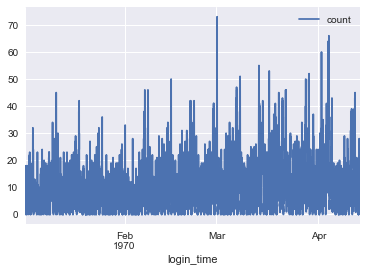

In [10]:
login=pd.DataFrame(index=logins_df['login_time']).sort_index()
login['count']=1
login=login.resample('15T').count()
login.plot()

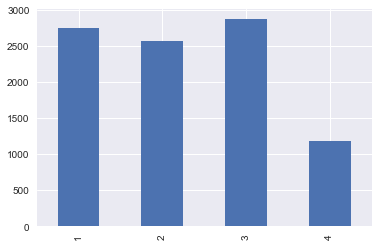

In [11]:
logins_groups_df.groupby(by=logins_groups_df.index.month).size().plot(kind='bar')

***Weekly***

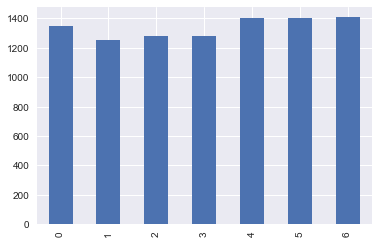

In [12]:
logins_groups_df.groupby(by=logins_groups_df.index.dayofweek).size().plot(kind='bar')

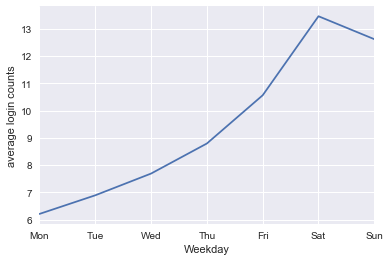

In [19]:
daily=login.groupby('Weekday')['count'].agg('mean')
weekdays=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

fig, ax = plt.subplots()

daily.plot()
ax.set_xticklabels(weekdays)
ax.set_xlabel('Weekday')
ax.set_ylabel('average login counts')

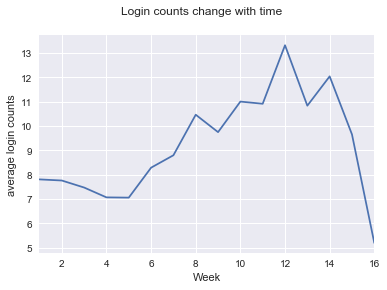

In [20]:
daily=login.groupby('Week')['count'].agg('mean')

fig, ax = plt.subplots()

daily.plot()
ax.set_xlabel('Week')
ax.set_ylabel('average login counts')
plt.suptitle('Login counts change with time')

***Daily***

The daily pattern illustrates that users are mostly active in the morning hours of 2am and 5am, the noon hours around 12pm and 10pm. 

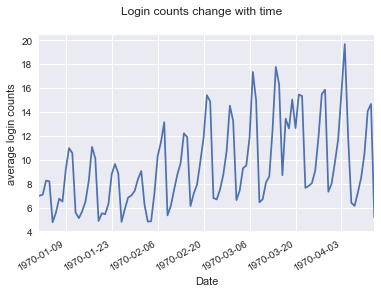

In [22]:
# trend after aggregating daily data
daily=login.groupby('Date')['count'].agg('mean')

fig, ax = plt.subplots()

daily.plot()
ax.set_xlabel('Date')
ax.set_ylabel('average login counts')
plt.suptitle('Login counts change with time')
fig.autofmt_xdate()

***Hourly***

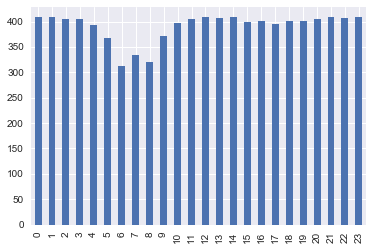

In [23]:
logins_groups_df.groupby(by=logins_groups_df.index.hour).size().plot(kind='bar')

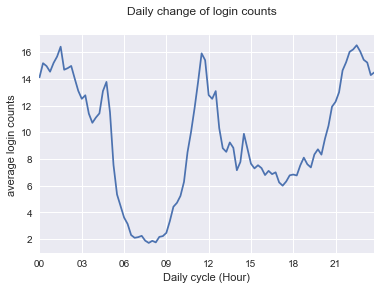

In [24]:
daily=login.groupby('Time')['count'].agg('mean')

fig, ax = plt.subplots()

daily.plot()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3600*3))
fig.canvas.draw() # in order to get labels from below, otherwise won't locate x tick labels
labels = [item.get_text()[:2] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('Daily cycle (Hour)')
ax.set_ylabel('average login counts')
plt.suptitle('Daily change of login counts')

Very consistent change in weekly usage.

### Part 2- Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all 
toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

**I would choose to measure number of drivers that serve by neighborhood and measure the number of trips per driver in the neigboring city**

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.

Please provide details on: 

a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**I would begin by doing some Hypothesis Testing. I would divide users into 2 groups as the control and experiment, irregardless of city. The user group that gets reimbursed would be the experiment and the control would be the users that don't recieve a reimbursement. I would then run this test for 2 weeks, so that I could collect enough of a sample then compare results of the two groups.
In each group samples have been divided into 2 categories (commuting from two cities, or one city).I would then perform a chi squared test to see if there is any statistical significance with commuters from 1 or 2 cities. P value < 0.05 = statistical significance ie) recomendation for toll reimbursement.**


### Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [25]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

In [26]:
data[0]

{u'avg_dist': 3.67,
 u'avg_rating_by_driver': 5.0,
 u'avg_rating_of_driver': 4.7,
 u'avg_surge': 1.1,
 u'city': u"King's Landing",
 u'last_trip_date': u'2014-06-17',
 u'phone': u'iPhone',
 u'signup_date': u'2014-01-25',
 u'surge_pct': 15.4,
 u'trips_in_first_30_days': 4,
 u'ultimate_black_user': True,
 u'weekday_pct': 46.2}

In [27]:
df = pd.DataFrame.from_dict(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [28]:
df.last_trip_date = pd.to_datetime(df.last_trip_date, format='%Y-%m-%d')
df.signup_date = pd.to_datetime(df.signup_date, format='%Y-%m-%d')

In [29]:
# converting categorical data to binary for logistic regression
df['is_Astapor'] = np.where(df.city == 'Astapor', 1, 0)
df['is_Kings'] = np.where(df.city == 'King\'s Landing', 1, 0)
df['is_iPhone'] = np.where(df.phone == 'iPhone', 1, 0)
df['ultimate_black_user_binary'] = np.where(df.ultimate_black_user == True, 1, 0)

In [30]:
# need to process NaNs
df.isnull().sum()

avg_dist                         0
avg_rating_by_driver           201
avg_rating_of_driver          8122
avg_surge                        0
city                             0
last_trip_date                   0
phone                          396
signup_date                      0
surge_pct                        0
trips_in_first_30_days           0
ultimate_black_user              0
weekday_pct                      0
is_Astapor                       0
is_Kings                         0
is_iPhone                        0
ultimate_black_user_binary       0
dtype: int64

In [31]:
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(skipna=True), inplace=True)

In [32]:
df.isnull().sum()

avg_dist                        0
avg_rating_by_driver          201
avg_rating_of_driver            0
avg_surge                       0
city                            0
last_trip_date                  0
phone                         396
signup_date                     0
surge_pct                       0
trips_in_first_30_days          0
ultimate_black_user             0
weekday_pct                     0
is_Astapor                      0
is_Kings                        0
is_iPhone                       0
ultimate_black_user_binary      0
dtype: int64

In [33]:
df_mask = df[df.avg_rating_by_driver.notnull()]

In [34]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,is_Astapor,is_Kings,is_iPhone,ultimate_black_user_binary
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,1,1,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,0,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0,1,1,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,0,0,0


In [35]:
df_mask.describe(include='all')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,is_Astapor,is_Kings,is_iPhone,ultimate_black_user_binary
count,49799.000000,49799.000000,49799.000000,49799.000000,49799,49799,49406,49799,49799.000000,49799.000000,49799,49799.000000,49799.000000,49799.000000,49799.000000,49799.000000
unique,NaN,NaN,NaN,NaN,3,182,2,31,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Winterfell,2014-06-29 00:00:00,iPhone,2014-01-18 00:00:00,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,23233,2033,34446,2936,NaN,NaN,30979,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:00:00,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-07-01 00:00:00,NaN,2014-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.795332,4.778158,4.601762,1.074396,NaN,NaN,NaN,NaN,8.821665,2.285166,NaN,60.957132,0.330850,0.202615,0.691701,0.377919
std,5.665794,0.446652,0.564056,0.220694,NaN,NaN,NaN,NaN,19.860920,3.798589,NaN,37.017558,0.470524,0.401952,0.461796,0.484872
min,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,33.300000,0.000000,0.000000,0.000000,0.000000


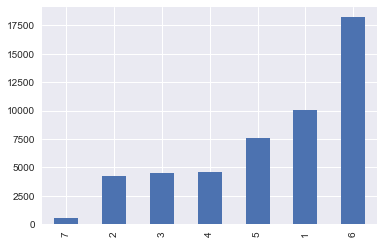

In [36]:
df_mask.last_trip_date.dt.month.value_counts().sort_values().plot(kind='bar')

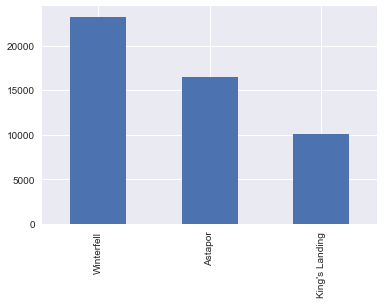

In [37]:
df_mask.city.value_counts().plot(kind='bar')

In [38]:
df['active_six'] = np.where(df.last_trip_date.dt.month >= 6, 1, 0)

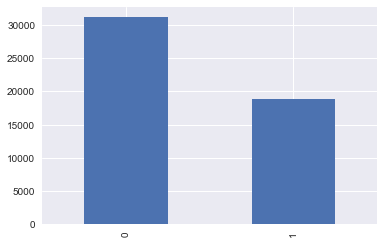

In [39]:
df.active_six.value_counts().plot(kind='bar')

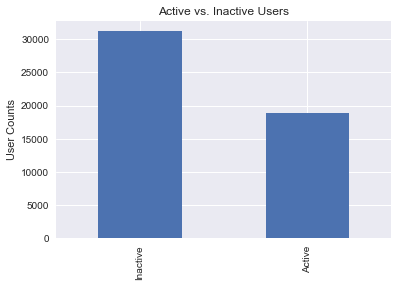

In [40]:
df.active_six.value_counts().plot(kind='bar')
plt.xticks(range(2), ('Inactive', 'Active'))
plt.ylabel("User Counts")
plt.title("Active vs. Inactive Users")
plt.show()

In [41]:
df.dtypes, df.shape

(avg_dist                             float64
 avg_rating_by_driver                 float64
 avg_rating_of_driver                 float64
 avg_surge                            float64
 city                                  object
 last_trip_date                datetime64[ns]
 phone                                 object
 signup_date                   datetime64[ns]
 surge_pct                            float64
 trips_in_first_30_days                 int64
 ultimate_black_user                     bool
 weekday_pct                          float64
 is_Astapor                             int32
 is_Kings                               int32
 is_iPhone                              int32
 ultimate_black_user_binary             int32
 active_six                             int32
 dtype: object, (50000, 17))

In [42]:
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])
df['signup_date']=pd.to_datetime(df['signup_date'])
df['signup_weekday']=df['signup_date'].dt.weekday
days_between_signup_and_last_trip=(df['last_trip_date']-df['signup_date']).dt.days

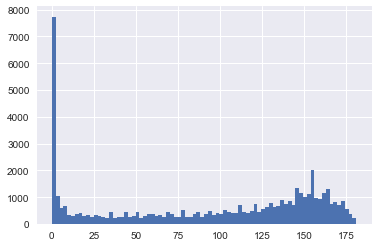

In [43]:
days_between_signup_and_last_trip.hist(bins=80)

In [44]:
print('%.1f percent of users are retained.'%(100*len(df[days_between_signup_and_last_trip>151])/len(df)))

23.0 percent of users are retained.


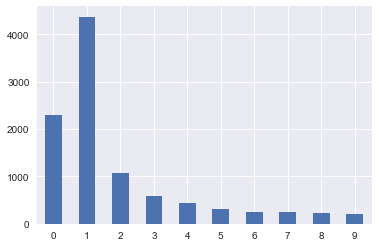

In [45]:
days_between_signup_and_last_trip[days_between_signup_and_last_trip<10].value_counts().sort_index().plot.bar(rot=0);

In [46]:
print('%.1f percent of users only uses the trip within 3 days of signing up. These kind of users are defined to be short-term users.'%(100*len(df[days_between_signup_and_last_trip<3])/len(df)))

15.0 percent of users only uses the trip within 3 days of signing up. These kind of users are defined to be short-term users.


In [47]:
days_between_signup_and_last_trip
df['retained']=days_between_signup_and_last_trip.apply(lambda x:'retained' if x>151 else 'short-term' if x<3 else 'other not retained')

In [48]:
df.columns[df.isnull().any()]

Index([u'avg_rating_by_driver', u'phone'], dtype='object')

In [49]:
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(),inplace=True)
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(),inplace=True)
df.phone.fillna('Unknown',inplace=True)
df.columns[df.isnull().any()]

Index([], dtype='object')

In [50]:
df[df.avg_dist==0].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,is_Astapor,is_Kings,is_iPhone,ultimate_black_user_binary,active_six,signup_weekday,retained
72,0.0,3.0,5.000000,1.0,Astapor,2014-01-08,iPhone,2014-01-07,0.0,1,False,100.0,1,0,1,0,0,1,short-term
116,0.0,5.0,5.000000,1.0,Winterfell,2014-01-11,Android,2014-01-10,0.0,1,False,100.0,0,0,0,0,0,4,short-term
188,0.0,5.0,4.601559,1.0,Winterfell,2014-01-14,Android,2014-01-11,0.0,1,False,100.0,0,0,0,0,0,5,other not retained
356,0.0,5.0,4.000000,1.0,Winterfell,2014-01-16,Android,2014-01-15,0.0,1,False,100.0,0,0,0,0,0,2,short-term
479,0.0,5.0,5.000000,1.0,Winterfell,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0,0,0,1,0,0,4,short-term


In [51]:
continous_val=['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge','surge_pct',
       'trips_in_first_30_days','weekday_pct', 'signup_weekday','retained']

continous=df[continous_val]

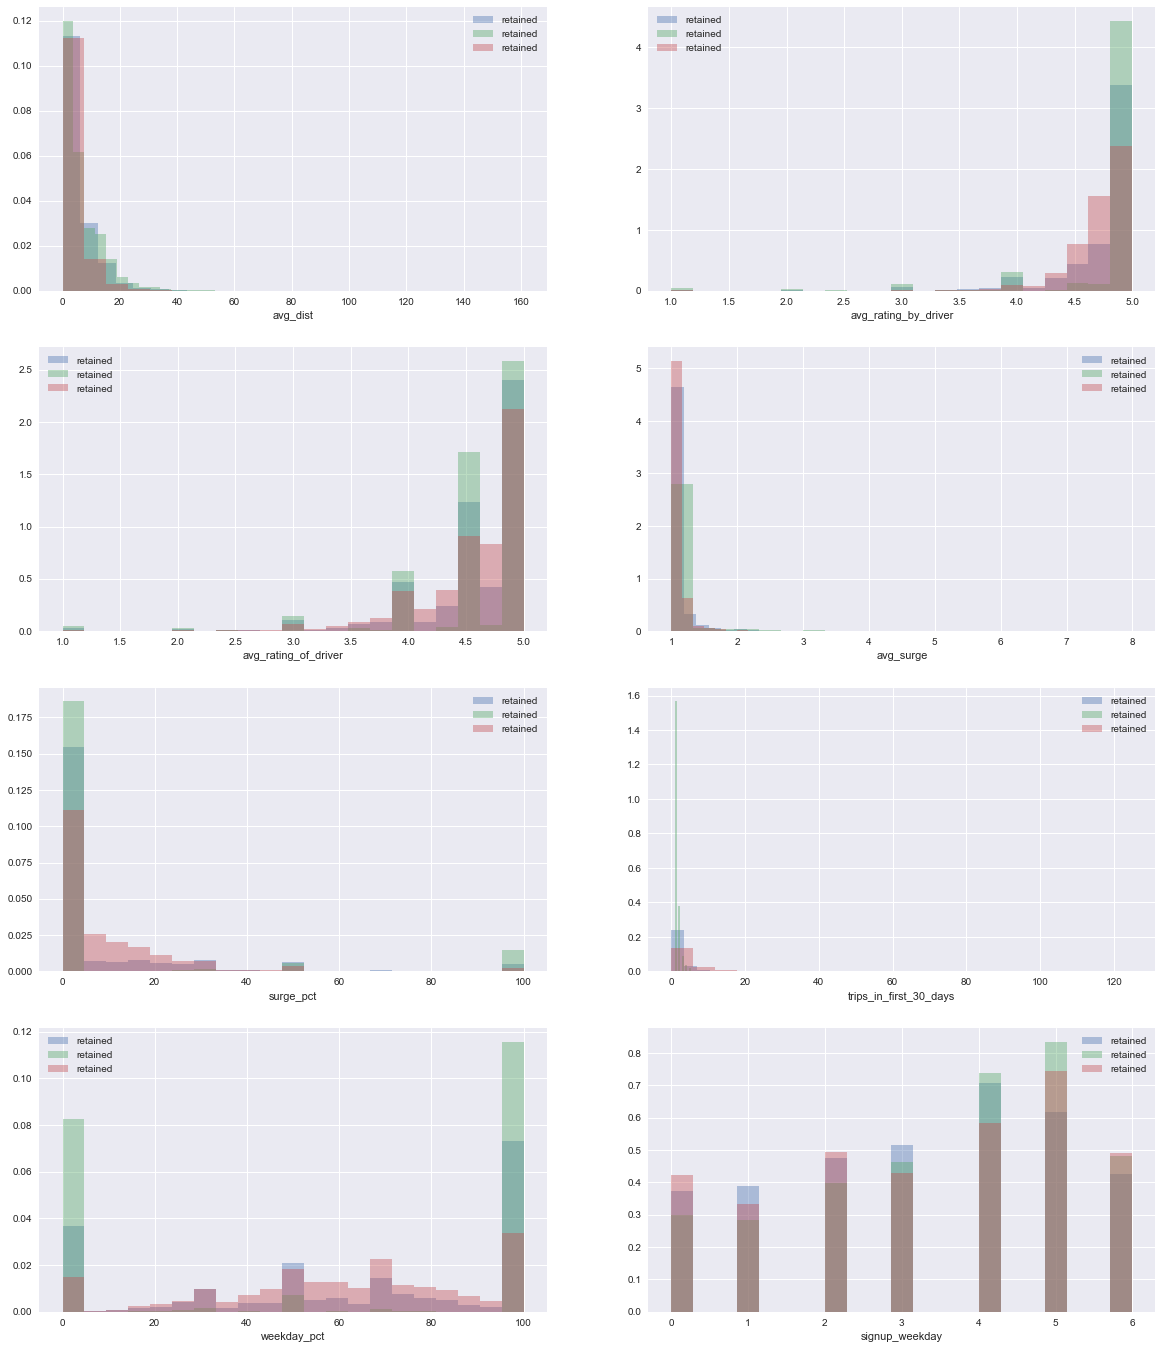

In [53]:

plt.figure(figsize=(20,24))
for i in range(1,len(continous_val)):
    plt.subplot(4,2,i)
    col=continous_val[i-1]
    for n in df.retained.unique():
        df.loc[df.retained==n,col].hist(label='retained',normed=True,alpha=0.4,bins=21)
   
    plt.legend()
    plt.gca().set_xlabel(col)
    i+=1

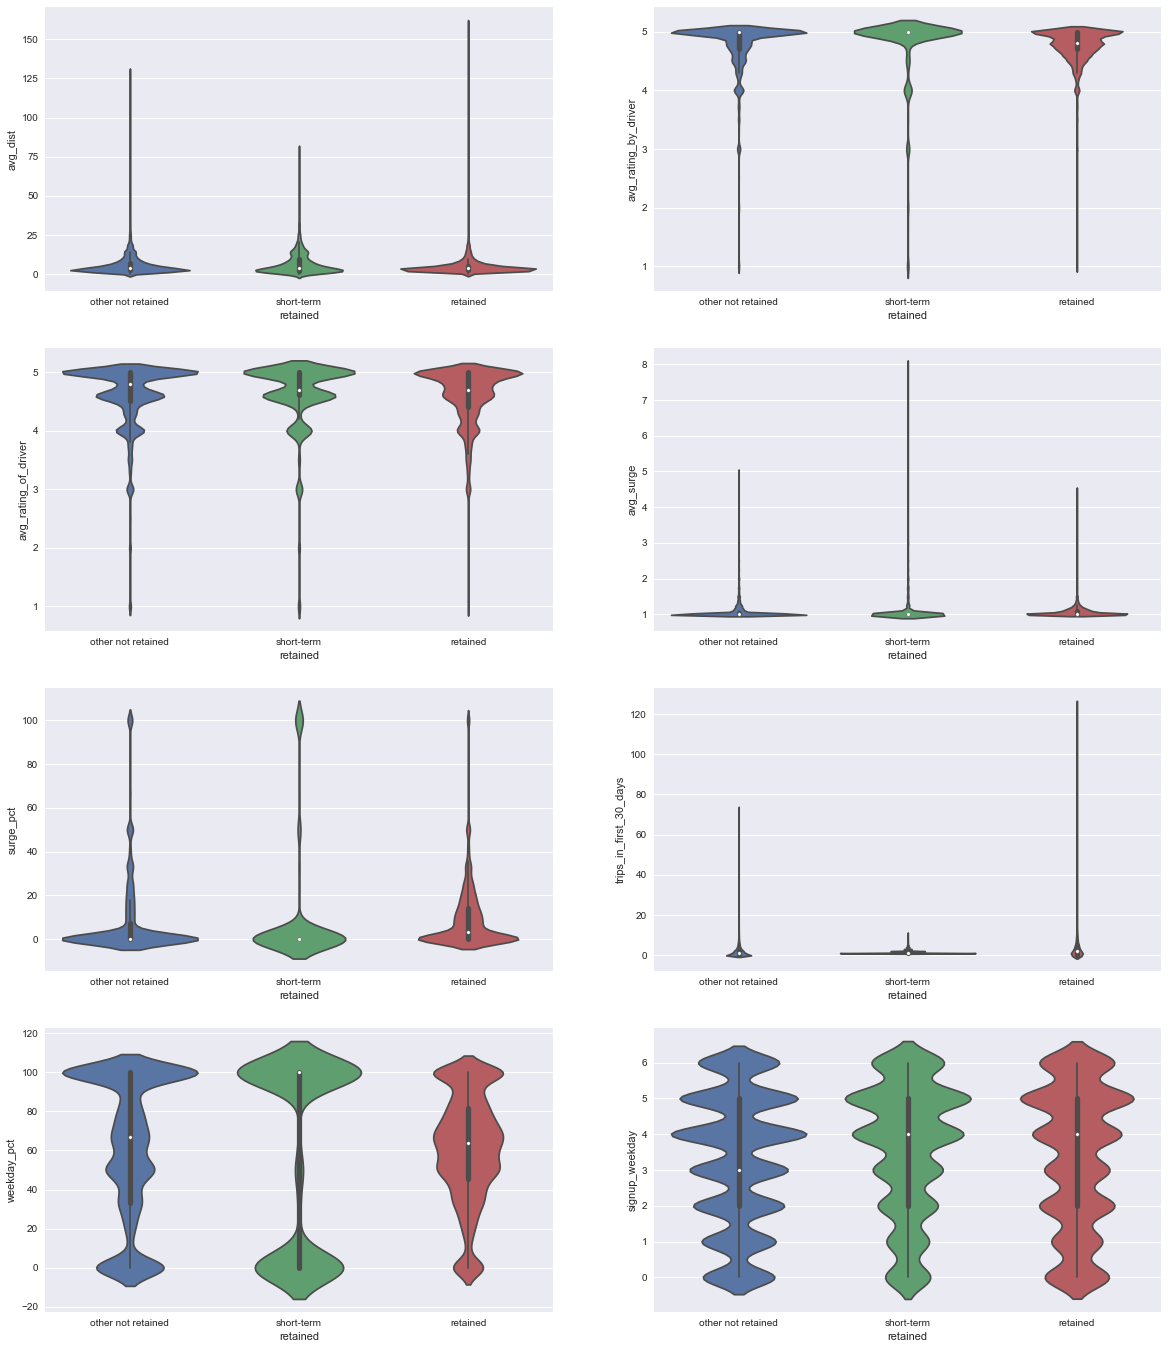

In [54]:
plt.figure(figsize=(20,24))
for i in range(1,len(continous_val)):
    plt.subplot(4,2,i)
    col=continous_val[i-1]
    
    sns.violinplot('retained', col, data=continous)
    i+=1

In [55]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Modeling:


In [56]:
def separate_label_features(df, labelcol):
    label=df[labelcol]
    features=df.drop(labelcol,axis=1)
    return features, label

def DictVectorizer_cat(df, cols):
    dv = DictVectorizer(sparse=False) 
    transformed=pd.DataFrame(dv.fit_transform(df[cols].to_dict( orient = 'records' )), columns=dv.feature_names_)
    return df.drop(cols,axis=1).join(transformed)


features, label=separate_label_features(df, 'retained')

features.drop(['last_trip_date','signup_date'],axis=1,inplace=True)
features['ultimate_black_user']=features['ultimate_black_user'].astype(int)

cat=['city','phone']    
features=DictVectorizer_cat(features,cat)

# two ways of labeling: only label retained and not retained, label three classes
le = preprocessing.LabelEncoder()
label_3 = le.fit_transform(label)
classes_N=len(le.classes_)
print('label_3:',list(zip(le.classes_,le.transform(le.classes_))))
label_2=label=='retained'


# train test split
X_train_1, X_test_2, y_train_1, y_test_1 = train_test_split(features, label_2, test_size=0.2, random_state=12)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features, label_3, test_size=0.2, random_state=12)

('label_3:', [('other not retained', 0), ('retained', 1), ('short-term', 2)])


In [57]:
model = LogisticRegression(max_iter=500, solver='sag', n_jobs=4)

In [58]:
model.fit(X_train_1, y_train_1)

C:\Users\Danny Arenson\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
model.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
preds = model.predict(X_train_1)

In [61]:

print(accuracy_score(preds, y_train_1))

0.85835


In [62]:
confusion_matrix(y_true=y_train_1, y_pred=preds)

array([[24960,  5659,     1],
       [    6,  9374,     0],
       [    0,     0,     0]])

In [63]:
print(classification_report(y_true=y_train_2, y_pred=preds))

             precision    recall  f1-score   support

          0       0.75      0.77      0.76     24433
          1       0.62      1.00      0.77      9380
          2       0.00      0.00      0.00      6187

avg / total       0.61      0.70      0.64     40000



In [64]:
model2 = LogisticRegression(max_iter=500, solver='sag', n_jobs=2)
model2 = GridSearchCV(model2, param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}, scoring='accuracy', n_jobs=4, 
                     cv=StratifiedKFold(n_splits=5))
model2.fit(X_train_1, y_train_1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [65]:
model2.cv_results_

{'mean_fit_time': array([  3.81219997,   7.12479997,   7.70679998,  11.20540004,
         12.1902    ,  12.24199996,  11.65099993]),
 'mean_score_time': array([ 0.03680005,  0.00720005,  0.00300002,  0.00539999,  0.00400004,
         0.00460005,  0.002     ]),
 'mean_test_score': array([ 0.7739  ,  0.80865 ,  0.856475,  0.858625,  0.85875 ,  0.858775,
         0.858775]),
 'mean_train_score': array([ 0.7738125 ,  0.80890625,  0.8566375 ,  0.85869375,  0.85845   ,
         0.85841875,  0.85840625]),
 'param_C': masked_array(data = [0.0001 0.001 0.01 0.1 1 10 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}),
 'rank_test_score': array([7, 6, 5, 4, 3, 1, 1]),
 'split0_test_score': array([ 0.77325 ,  0.809375,  0.856625,  0.856   ,  0.855875,  0.855625,
         0.855625]),
 'split0_train_score': array([ 0.7738125 ,  0.8095    ,  0.85